<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/Analisis_descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 - Análisis descriptivo

Para el desarrollo de este notebook, se utilizó una base de datos proveniente de [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) que contiene información de



* People

  -  ID: Customer's unique identifier
  -  Year_Birth: Customer's birth year
  -  Education: Customer's education level
  -  Marital_Status: Customer's marital status
  -  Income: Customer's yearly household income
  -  Kidhome: Number of children in customer's household
  -  Teenhome: Number of teenagers in customer's household
  -  Dt_Customer: Date of customer's enrollment with the company
  -  Recency: Number of days since customer's last purchase
  -  Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* Products

  - MntWines: Amount spent on wine in last 2 years

  - MntFruits: Amount spent on fruits in last 2 years

  - MntMeatProducts: Amount spent on meat in last 2 years

  - MntFishProducts: Amount spent on fish in last 2 years

  - MntSweetProducts: Amount spent on sweets in last 2 years
  
  - MntGoldProds: Amount spent on gold in last 2 years

* Promotion
  
  - NumDealsPurchases: Number of purchases made with a discount
  
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place
  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month


---

Conexión con google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importación de librerías

In [ ]:
import pandas as pd # manejo de Data Frame en Python
pd.set_option('display.max_columns', 50) # Aumenta el número de columnas
import numpy as np
# Librería de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Establecer la ruta donde se van a trabajar el notebook y donde está el archivo.

## Exploración preliminar del archivo

*  Haga una visualización del formato de las primeras 10 filas del dataframe
*  Haga un ``print`` donde diga cuantas filas y columnas tiene el dataframe
*  Presente cual es el nombre de las variables que tiene el dataframe
*  Luego establezca cuantos registros hay con datos faltantes




In [ ]:
path= "/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Aprendizaje no supervisado/marketing_campaign.csv" # Colocar la ubicación del archivo
datos= pd.read_csv(path,sep="\t") # Creamos el dataframe con los datos
datos.head(10) #Visualizamos los datos, 10 primera filas


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
#Información dle numero de filas y columnas del dataFrame
Rows=len(datos)
Columns=len(datos.columns)
print(f"EL numero de filas de la base de datos es {Rows} y el numero de dolumnas {Columns}")

EL numero de filas de la base de datos es 2240 y el numero de dolumnas 29


In [ ]:
#Revisar el nombre de las variables
datos.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Contar los datos faltantes por variable
datos_faltantes = datos.isna().sum()
datos_faltantes

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Eliminar filas con al menos un valor faltante
df_sin_faltantes = datos.dropna()

# Mostrar el DataFrame sin datos faltantes
print(df_sin_faltantes)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88  

¿Cuántos registros con datos faltantes se eliminaron?
Se eliminaron 24 registros

¿Cuántos registros quedan después de eliminar los datos faltantes?
2216


---


## Creación de variables

¿Qué variables se necesitan?

Se ha identificado que se deben crear 2 variables nuevas

*  Edad
*  Número de campañas aceptadas en total
*  Número de campañas aceptadas por cliente
*  Número de clientes que aceptaron en cada campaña
*  Número de hijos
*  Tiene hijos



---




Eliminar variables

¿Qué variables se podrían eliminar?

Variables que ya se usaron o se cree que no se van a utilizar




---

In [ ]:
# Crear la nueva variable 'Edad'
datos['Edad'] = 2025 - datos['Year_Birth']

# Mostrar el DataFrame con la nueva variable
print(datos)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88  

In [36]:
#Sacamos el nunero total de campañas aceptadas
num_Camp_aceptadas = 0  # Inicializar el contador

for columna in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    num_Camp_aceptadas += datos[columna].sum()  # Sumar los valores True (1) de cada columna

print("El número total de campañas aceptadas fue:", num_Camp_aceptadas)

El número total de campañas aceptadas fue: 667


In [37]:
# Crear la nueva variable 'TotalAcceptCmp' sumando los valores de las campañas aceptadas por cada cliente.
columnas_campañas = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
datos["TotalAcceptCmp"] = datos[columnas_campañas].sum(axis=1)

# Mostrar el DataFrame con la nueva variable
print(datos)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88  

In [40]:
# Número de clientes que aceptaron en cada campaña
num_clientes_cmp1 = datos["AcceptedCmp1"].sum()
num_clientes_cmp2 = datos["AcceptedCmp2"].sum()
num_clientes_cmp3 = datos["AcceptedCmp3"].sum()
num_clientes_cmp4 = datos["AcceptedCmp4"].sum()
num_clientes_cmp5 = datos["AcceptedCmp5"].sum()
num_clientes_response = datos["Response"].sum()

# Imprimir los resultados
print("Número de clientes que aceptaron en la campaña 1:", num_clientes_cmp1)
print("Número de clientes que aceptaron en la campaña 2:", num_clientes_cmp2)
print("Número de clientes que aceptaron en la campaña 3:", num_clientes_cmp3)
print("Número de clientes que aceptaron en la campaña 4:", num_clientes_cmp4)
print("Número de clientes que aceptaron en la campaña 5:", num_clientes_cmp5)
print("Número de clientes que aceptaron en la última campaña (Response):", num_clientes_response)

Número de clientes que aceptaron en la campaña 1: 144
Número de clientes que aceptaron en la campaña 2: 30
Número de clientes que aceptaron en la campaña 3: 163
Número de clientes que aceptaron en la campaña 4: 167
Número de clientes que aceptaron en la campaña 5: 163
Número de clientes que aceptaron en la última campaña (Response): 334


In [43]:
# Función para asignar True o False según la condición de si tiene hijo o no.
def tiene_hijo(valor):
    if valor > 0:
        return True
    else:
        return False

# Crear la nueva variable 'Tiene_Kidhome' aplicando la función a la columna 'Kidhome'
datos['Tiene_hijo'] = datos['Kidhome'].apply(tiene_hijo)

# Mostrar el DataFrame con la nueva variable
print(datos)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88  

# Visualización de datos


## ``Matplolib``



Gráfico de barras

Realice un gráfico de barras de los clientes por el estado civil

Realice un gráfico de pastel de los clientes por estado civil

Realice un histograma para las personas que tienen ingresos menores a 200000

Haga un diagrama de Box-plot para los ingresos

Realice un diagrama de dispersión para los clientes que tienen ingresos menores a 200000 versus la cantidad gastada en vino en los ultimos 2 años

In [45]:
# Obtener los valores únicos de la columna 'Marital_Status' esto es relevante para saber en que categorias se pueden clasificar los clientes
valores_unicos= datos['Marital_Status'].unique()

# Imprimir los valores únicos
print("Valores únicos de la variable Marital_Status:")
print(valores_unicos)

Valores únicos de la variable Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


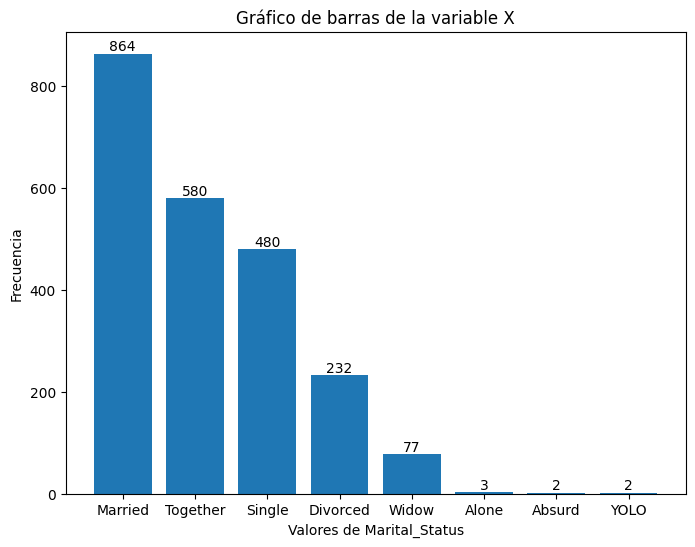

In [49]:

# Contar la frecuencia de cada valor único en la columna 'X'
frecuencia_valores= datos['Marital_Status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico (opcional)
barras = plt.bar(frecuencia_valores.index, frecuencia_valores.values)  # Guardar las barras en una variable


# Añadir etiquetas de texto encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, str(altura), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel("Valores de Marital_Status")
plt.ylabel("Frecuencia")
plt.title("Gráfico de barras de la variable X")

# Mostrar el gráfico
plt.show()

***Interpretación del grafico de barras***

La mayoria de nuestros clientes son casadas o cuenta con pareja estable.

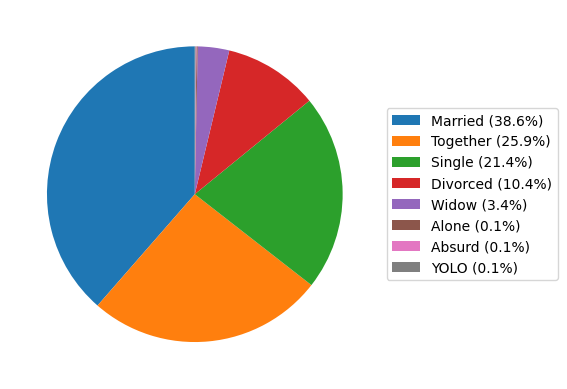

In [54]:
# Crear el gráfico de pastel sin porcentajes en el gráfico
plt.pie(frecuencia_valores.values, startangle=90)

# Crear la leyenda con etiquetas y porcentajes
etiquetas_leyenda = [f"{label} ({porcentaje:.1f}%)" for label, porcentaje in zip(frecuencia_valores.index, frecuencia_valores.values / frecuencia_valores.sum() * 100)]

plt.legend(etiquetas_leyenda, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

***Interpretación del grafico de pastel***

Mas del 50% de nuestros clientes son casados o con pareja estable.